<a href="https://colab.research.google.com/github/priya170807/Time-seriesAnalysis/blob/main/Azure_dataset_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [3]:
data_path = '/content/drive/MyDrive/vmtable.csv/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecount', 'vmmemory']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')


#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecount']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [4]:
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [5]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2013767
Total Number of Subscriptions in the Dataset: 5958
Total Number of Deployments in the Dataset: 35941
Total VM Hours Available in the Dataset: 104371713.416667
Total Core Hours Available in the Dataset: 237815104.750000


In [6]:
trace_dataframe["subscriptionid"].value_counts()

+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7    128047
1pvP5oaK47WSSY0IZRNEQYdTLEx79rf7Gj1isBYW1jDOFGZXLQGTa0V3XnCrLrkB    111509
IBRuELx83WZHD8ZBmRnQ7nN53DxcMPAO7szqGt218k7STW7rx0pjgjj5eLJ0FLbn     93427
BShs5OvpbfrccmXj7X4MwSxkSFVNdSOzhYaDEKCijpvxWWkNByokK6c31F1uCT7R     85874
8aRytjOt2E+dixkPugZHbKFROou3eQLywft928DTtFP2o3QzFTIxYQ+8r0kdkzvo     68490
                                                                     ...  
DdTzWvGEvnV46TLC8N6IT61wO8jOjL8aE08mGJDPfM6M4q3AXslfcgE6y4T2GZaD         1
oDUVplfZsbOk1vSvvN4De+F40qJxVWTvUtbx8BBQxoL7ML9M825krTct87Zz/n49         1
fn/lLqJAGFT+lJiPY3Qs4y+b3uw3xzW7eAKPz3UX5wWG/892rdoe6al6og3bklYj         1
q9/8J+j965A1ZcTUOnjUfcGFHXo0JXC66VlbSUmblqAShh2EIlpAOKcVXh74ryWw         1
kAWnZ6ZC+AZrg9sfaUTyHn+STNRZsRFyCV1zMCEn8hioTLZw0GpZsmNQMclXaMDy         1
Name: subscriptionid, Length: 5958, dtype: int64

In [7]:
oneVM_data = trace_dataframe[trace_dataframe["subscriptionid"] == "+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7"]

In [8]:
oneVM_data.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667


In [9]:
len(oneVM_data)

128047

In [10]:
oneVM_data.reset_index(drop=True, inplace=True)

In [11]:
yearly_data = oneVM_data.loc[0:8039]

In [12]:
yearly_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,OTZc2y53zvg3JhthNOmD7rri2jIx6ylz/DIJT1tNugg7cZ...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,89.453653,24.363767,89.453653,Unkown,4,7.00,0.250000,1.000000
8036,tnl2xbaHNEfNpKM9Ylt4GdprJQebEUKI5EX85FG5qipIMU...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2120400,2129100,98.841736,5.960542,95.854683,Unkown,8,14.00,2.416667,19.333333
8037,taFDbwKxCHHITWK1aZR/apJfQpfgFIULfe2mlctkC2LSxk...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,70.042481,19.129137,70.042481,Unkown,4,7.00,0.250000,1.000000
8038,PAwZT/m/JA73C1YnFV1f29HgcPsxHojX2AlAdmHJSDww34...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1221000,1236900,47.881668,1.742805,6.803815,Delay-insensitive,8,14.00,4.416667,35.333333


In [13]:
from datetime import datetime
from datetime import datetime
Timestamp = pd.date_range('2020-01-01', periods=8040, freq='H')
#bytes_df["Timestamp"] = pd.date_range(datetime(2020, 11, 15, hour=23, minute=0), periods=3945, freq='5min')

In [14]:
time_stamp = pd.Series(Timestamp)

In [15]:
useful_data = yearly_data[["maxcpu"]]

In [16]:
useful_data["Timestamp"] = time_stamp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
useful_data.head()

,maxcpu,Timestamp
0,66.909246,2020-01-01 00:00:00
1,6.510768,2020-01-01 01:00:00
2,66.956558,2020-01-01 02:00:00
3,98.795780,2020-01-01 03:00:00
4,6.472197,2020-01-01 04:00:00


In [18]:
data = useful_data.copy()

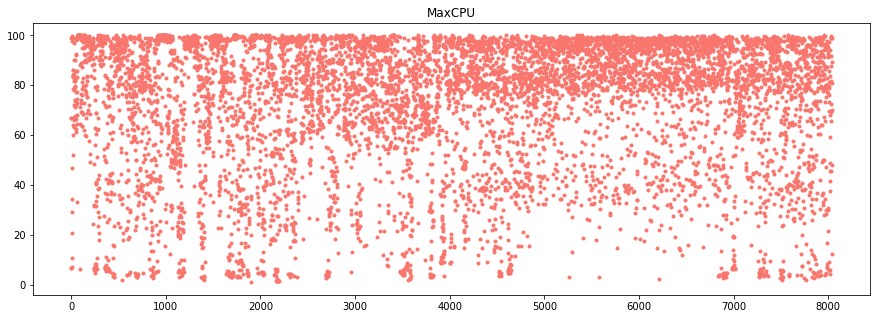

In [19]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
data['maxcpu'].plot(style='.', figsize=(15,5), color=color_pal[0], title='MaxCPU')
plt.show()

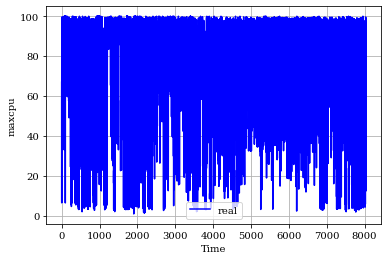

In [20]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(data['maxcpu'], "-b", label="real")
# plt.plot(y_pred, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
#plt.savefig('original.png', format='png', dpi=720)
plt.show()

In [21]:
data.head()

,maxcpu,Timestamp
0,66.909246,2020-01-01 00:00:00
1,6.510768,2020-01-01 01:00:00
2,66.956558,2020-01-01 02:00:00
3,98.795780,2020-01-01 03:00:00
4,6.472197,2020-01-01 04:00:00


In [22]:
data = data.set_index("Timestamp")

In [23]:
data = data.reset_index()

In [24]:
data.head()

,Timestamp,maxcpu
0,2020-01-01 00:00:00,66.909246
1,2020-01-01 01:00:00,6.510768
2,2020-01-01 02:00:00,66.956558
3,2020-01-01 03:00:00,98.795780
4,2020-01-01 04:00:00,6.472197


In [25]:
# the other implementation using tensorflow datasets

In [26]:
data.to_csv("/tmp/cleaned_data.csv")

In [27]:
df = data["maxcpu"]

In [28]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

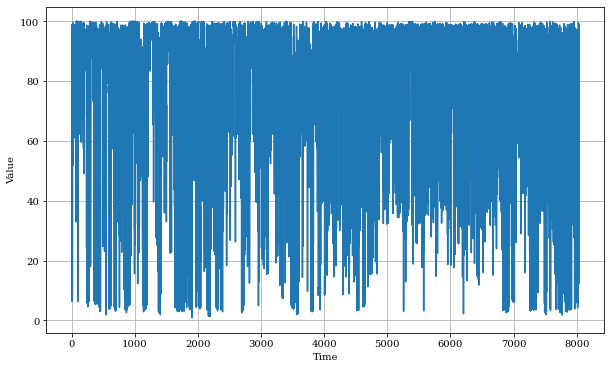

In [29]:
import csv
time_step = []
maxcpu = []

with open('/tmp/cleaned_data.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    maxcpu.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(maxcpu)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

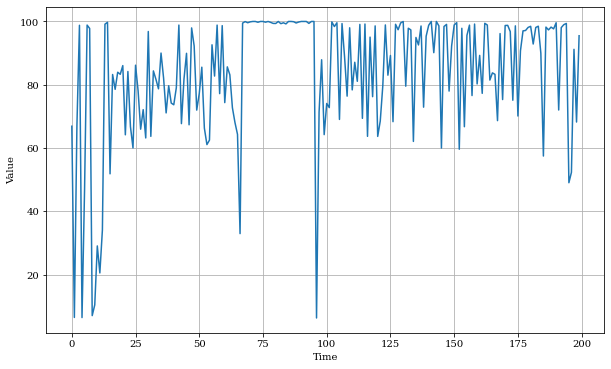

In [30]:
series = np.array(maxcpu)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series, start=0, end=200)

In [31]:
split_time = 7000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

#window_size = 48
#batch_size = 32
shuffle_buffer_size = 1000


In [32]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [33]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [34]:
import tensorflow as tf
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 72
batch_size = 128
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(7000,)
Epoch 1/100
55/55 [==============================] - 1s 22ms/step - loss: 57.0777 - mae: 57.5768
Epoch 2/100
55/55 [==============================] - 1s 22ms/step - loss: 42.3579 - mae: 42.8563
Epoch 3/100
55/55 [==============================] - 1s 23ms/step - loss: 31.3723 - mae: 31.8707
Epoch 4/100
55/55 [==============================] - 1s 22ms/step - loss: 24.1748 - mae: 24.6717
Epoch 5/100
55/55 [==============================] - 1s 22ms/step - loss: 20.9997 - mae: 21.4952
Epoch 6/100
55/55 [==============================] - 1s 22ms/step - loss: 20.2516 - mae: 20.7465
Epoch 7/100
55/55 [==============================] - 1s 21ms/step - loss: 20.1008 - mae: 20.5953
Epoch 8/100
55/55 [==============================] - 1s 23ms/step - loss: 20.0286 - mae: 20.5229
Epoch 9/100
55/55 [==============================] - 1s 22ms/step - loss: 19.9635 - mae: 20.4576
Epoch 10/100
55/55 [=====

(1e-08, 0.0001, 0.0, 60.0)

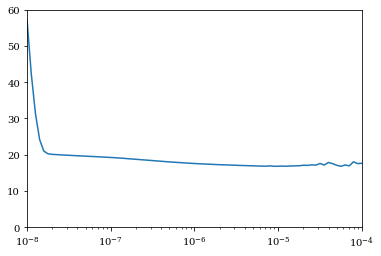

In [35]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [37]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=72, batch_size=128, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
55/55 [==============================] - 1s 21ms/step - loss: 22.0552 - mse: 966.4897
Epoch 2/500
55/55 [==============================] - 1s 21ms/step - loss: 18.0234 - mse: 644.7379
Epoch 3/500
55/55 [==============================] - 1s 21ms/step - loss: 17.8515 - mse: 636.5337
Epoch 4/500
55/55 [==============================] - 1s 21ms/step - loss: 17.6733 - mse: 622.6784
Epoch 5/500
55/55 [==============================] - 1s 22ms/step - loss: 17.5886 - mse: 620.5593
Epoch 6/500
55/55 [==============================] - 1s 22ms/step - loss: 17.5072 - mse: 615.8077
Epoch 7/500
55/55 [==============================] - 1s 22ms/step - loss: 17.4157 - mse: 607.0694
Epoch 8/500
55/55 [==============================] - 1s 22ms/step - loss: 17.5088 - mse: 617.4478
Epoch 9/500
55/55 [==============================] - 1s 23ms/step - loss: 17.3170 - mse: 605.5692
Epoch 10/500
55/55 [==============================] - 1s 23ms/step - loss: 17.2516 - mse: 602.4617
Epoch 11/500
55/55 

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

In [38]:
series.shape

(8040,)

In [39]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)

In [46]:
#print("train_set shape ={}".format(len(train_set)))
#print("rnn_forecast shape ={}".format(rnn_forecast[:,:,:].shape))

In [56]:
rnn_forecast_totalpoints = rnn_forecast[:, :, :]

In [57]:
rnn_forecast_totalpoints.shape

(7969, 72, 1)

In [40]:
rnn_forecast_1d = rnn_forecast[split_time - window_size:-1, -1, 0]

In [ ]:
# last_value = rnn_forecast[-1,:,:]
# next_pred = model_forecast(model, last_value, window_size)

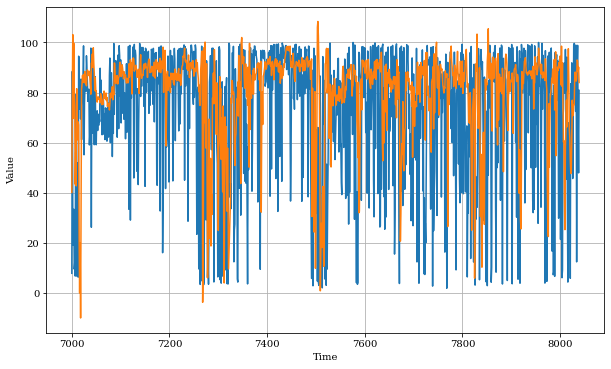

In [53]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast_1d)

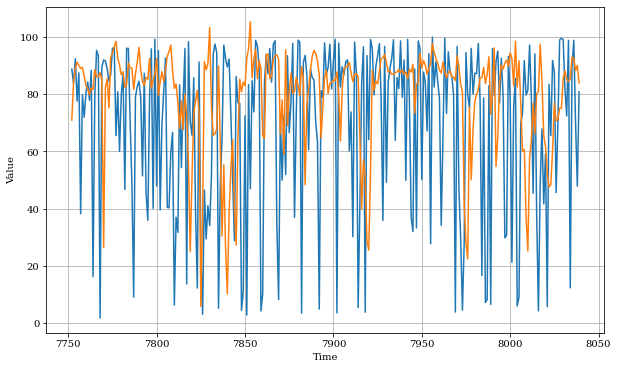

In [54]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[-288:], x_valid[-288:])
plot_series(time_valid[-288:], rnn_forecast_1d[-288:])

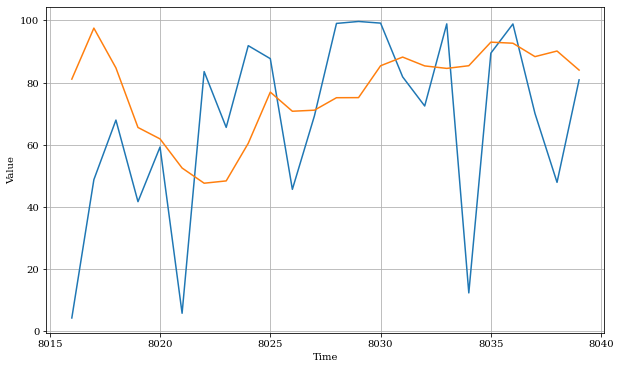

In [55]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[-24:], x_valid[-24:])
plot_series(time_valid[-24:], rnn_forecast_1d[-24:])

In [72]:
#get the last_value from the predictions on the test set and add back the array to the input

last_value = rnn_forecast_totalpoints[-1,:,:]


In [73]:
last_value.shape

(72, 1)

In [74]:
last_value

array([[85.3927  ],
       [67.67813 ],
       [72.983894],
       [68.46228 ],
       [74.97224 ],
       [ 9.781778],
       [24.888212],
       [16.38158 ],
       [67.82114 ],
       [44.267757],
       [57.637566],
       [75.700806],
       [79.34611 ],
       [81.0798  ],
       [86.11122 ],
       [86.104744],
       [88.48356 ],
       [82.36823 ],
       [86.1845  ],
       [92.15298 ],
       [71.559074],
       [79.05523 ],
       [95.27601 ],
       [55.505657],
       [65.689445],
       [84.22699 ],
       [89.58238 ],
       [88.45624 ],
       [90.523865],
       [91.5902  ],
       [89.4392  ],
       [94.05712 ],
       [92.339554],
       [82.67945 ],
       [98.102554],
       [82.36294 ],
       [91.37191 ],
       [78.75147 ],
       [63.16999 ],
       [63.090992],
       [38.632877],
       [26.634212],
       [58.952595],
       [64.55679 ],
       [76.86461 ],
       [66.95081 ],
       [80.07621 ],
       [81.31315 ],
       [97.42618 ],
       [84.41446 ],


In [78]:
last_value.shape

(72, 1)

In [75]:
next_pred1 = model_forecast(model, last_value, window_size)

In [76]:
next_pred1

array([[[87.47198 ],
        [82.56332 ],
        [83.15716 ],
        [86.114136],
        [81.337166],
        [79.22663 ],
        [68.39432 ],
        [41.94712 ],
        [53.591625],
        [57.382233],
        [56.897335],
        [43.867523],
        [68.69658 ],
        [74.29326 ],
        [74.0513  ],
        [75.64844 ],
        [77.103615],
        [78.24715 ],
        [80.63444 ],
        [83.92573 ],
        [83.649826],
        [82.487015],
        [84.236595],
        [85.7687  ],
        [83.58371 ],
        [80.929634],
        [85.68096 ],
        [85.78887 ],
        [86.01846 ],
        [88.553444],
        [89.87101 ],
        [91.105125],
        [92.68527 ],
        [91.43328 ],
        [92.24184 ],
        [93.25982 ],
        [92.29691 ],
        [91.4913  ],
        [87.36088 ],
        [81.18688 ],
        [73.74923 ],
        [62.054455],
        [87.58565 ],
        [84.94372 ],
        [86.24307 ],
        [84.40594 ],
        [79.2349  ],
        [75.3

In [79]:
next_pred1.shape

(1, 72, 1)

In [80]:
second_input = next_pred1[-1,:,:]

In [81]:
second_input.shape

(72, 1)

In [84]:
second_input

array([[87.47198 ],
       [82.56332 ],
       [83.15716 ],
       [86.114136],
       [81.337166],
       [79.22663 ],
       [68.39432 ],
       [41.94712 ],
       [53.591625],
       [57.382233],
       [56.897335],
       [43.867523],
       [68.69658 ],
       [74.29326 ],
       [74.0513  ],
       [75.64844 ],
       [77.103615],
       [78.24715 ],
       [80.63444 ],
       [83.92573 ],
       [83.649826],
       [82.487015],
       [84.236595],
       [85.7687  ],
       [83.58371 ],
       [80.929634],
       [85.68096 ],
       [85.78887 ],
       [86.01846 ],
       [88.553444],
       [89.87101 ],
       [91.105125],
       [92.68527 ],
       [91.43328 ],
       [92.24184 ],
       [93.25982 ],
       [92.29691 ],
       [91.4913  ],
       [87.36088 ],
       [81.18688 ],
       [73.74923 ],
       [62.054455],
       [87.58565 ],
       [84.94372 ],
       [86.24307 ],
       [84.40594 ],
       [79.2349  ],
       [75.35398 ],
       [76.95252 ],
       [75.36436 ],


In [87]:
second_input_last_element = second_input[-1][0]

In [88]:
second_input_last_element

90.1366

In [82]:
next_pred2 = model_forecast(model, second_input, window_size)

In [83]:
next_pred2

array([[[88.22808 ],
        [89.24279 ],
        [90.079185],
        [90.55791 ],
        [89.164085],
        [88.40212 ],
        [85.52038 ],
        [80.60884 ],
        [79.61531 ],
        [75.12227 ],
        [73.96069 ],
        [68.4022  ],
        [73.47768 ],
        [70.501236],
        [73.44942 ],
        [71.389114],
        [72.83631 ],
        [74.2807  ],
        [75.82769 ],
        [77.94248 ],
        [79.93486 ],
        [81.23587 ],
        [82.70439 ],
        [84.77338 ],
        [86.07256 ],
        [86.35072 ],
        [87.501976],
        [89.0984  ],
        [89.79337 ],
        [90.22005 ],
        [91.35212 ],
        [92.00781 ],
        [92.6046  ],
        [93.18834 ],
        [93.555275],
        [94.30176 ],
        [94.85748 ],
        [94.95055 ],
        [94.482735],
        [92.20336 ],
        [88.820854],
        [84.67255 ],
        [87.61933 ],
        [89.03474 ],
        [89.690056],
        [86.94111 ],
        [87.389984],
        [85.9

In [100]:
third_input=next_pred2[-1,:,:]

In [101]:
third_input_last_element=third_input[-1][0]

In [102]:
third_input_last_element

87.609406

In [103]:
next_pred3 = model_forecast(model,third_input,window_size)

In [104]:
next_pred3

array([[[88.49908 ],
        [91.07305 ],
        [93.20486 ],
        [92.91589 ],
        [93.38572 ],
        [93.03906 ],
        [93.295685],
        [92.04906 ],
        [90.678   ],
        [89.46267 ],
        [87.81725 ],
        [86.1531  ],
        [85.01396 ],
        [84.773544],
        [84.153496],
        [83.13824 ],
        [82.4285  ],
        [81.79938 ],
        [81.851974],
        [81.69676 ],
        [81.989525],
        [82.40788 ],
        [82.94586 ],
        [83.83634 ],
        [84.95191 ],
        [85.93754 ],
        [86.94815 ],
        [88.2334  ],
        [89.46892 ],
        [90.44997 ],
        [91.4543  ],
        [92.4935  ],
        [93.354866],
        [94.12451 ],
        [94.84058 ],
        [95.48584 ],
        [96.11284 ],
        [96.604965],
        [96.900826],
        [96.79161 ],
        [95.90309 ],
        [94.303406],
        [93.84079 ],
        [94.80036 ],
        [95.308846],
        [94.93724 ],
        [94.46949 ],
        [94.2

In [105]:
fourth_input=next_pred3[-1,:,:]

In [106]:
fourth_input_last_element=fourth_input[-1][0]

In [107]:
fourth_input_last_element

86.774666

In [108]:
next_pred4 = model_forecast(model,fourth_input,window_size)

In [109]:
fifth_input = next_pred4[-1,:,:]

In [110]:
fifth_input_last_element=fifth_input[-1][0]

In [111]:
fifth_input_last_element

91.28236

In [112]:
next_pred5 = model_forecast(model,fifth_input,window_size)

In [113]:
sixth_input = next_pred5[-1,:,:]

In [114]:
sixth_input_last_element=sixth_input[-1][0]

In [115]:
sixth_input_last_element

96.65334

In [ ]:
# Building the auto-regressive model for future predictions.

In [97]:
def auto_regressive_forecast(model,rnn_forecast_totalpoints,window_size):
  """
  finding the next prediction(sequence) and adding the sequence back as the input to predict next sequence.
  """
  predictions_future=[]
  count=0
  last_value = rnn_forecast_totalpoints[-1,:,:]
  predictions_future.append(last_value[-1][0])
  for i in range(24):
    next_pred = model_forecast(model, last_value, window_size)
    temp_value = next_pred[-1,:,:]
    predictions_future.append(temp_value[-1][0])
    last_value = temp_value
    count+=1
  return predictions_future

In [98]:
predictions_future = auto_regressive_forecast(model,rnn_forecast_totalpoints,window_size)

In [99]:
predictions_future

[87.568115,
 90.1366,
 87.609406,
 86.774666,
 91.28236,
 96.65334,
 100.06155,
 101.750755,
 102.49505,
 102.809586,
 102.944626,
 103.00571,
 103.034996,
 103.04956,
 103.056885,
 103.06053,
 103.06227,
 103.06312,
 103.0635,
 103.06367,
 103.063736,
 103.063774,
 103.06379,
 103.0638,
 103.06379]